<a href="https://colab.research.google.com/github/NabilahSharfina/TELCO-CUSTOMER-CHURN/blob/main/Copy_of_Program_TA2_With_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Connect Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# B. Import Library

In [2]:
import math
from collections import Counter
from pprint import pprint

import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

# Label Encoding: digunakan untuk tipe data ordinal
from sklearn.preprocessing import LabelEncoder
# One Hot Encoding: digunakan untuk bukan tipe data ordinal, seperti nominal, interval, atau ratio
from sklearn.preprocessing import OneHotEncoder

# Scalling Data
from sklearn.preprocessing import StandardScaler

# Handle imbalance dataset
from imblearn.over_sampling import SMOTE

# Splitting Data
from sklearn.model_selection import train_test_split


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For feature importance
from sklearn.datasets import make_classification

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# C. Data Preprocessing

## 1.1 Exploratory Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ITTP/KULIAH/SEMESTER 8/TUGAS AKHIR 2/IBM Dataset/IBM-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = pd.read_csv("/content/drive/MyDrive/ITTP/KULIAH/SEMESTER 8/TUGAS AKHIR 2/IBM Dataset/IBM-Telco-Customer-Churn.csv")
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### a. Change Data Type

In [6]:
# This column had missing values represented by ' '
# I noticed it when I tried converting it to float 
# and it gave me an error that it could not convert "string to float"
# df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN)
# df['TotalCharges'] = df['TotalCharges'].astype(float)

# #The varaible was imported as a string we need to convert it to float
# telecom['TotalCharges'] = telecom['TotalCharges'].astype(float) 
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
df.dtypes.value_counts()

object     16
int64       2
float64     2
dtype: int64

### b. Handling Missing Value

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

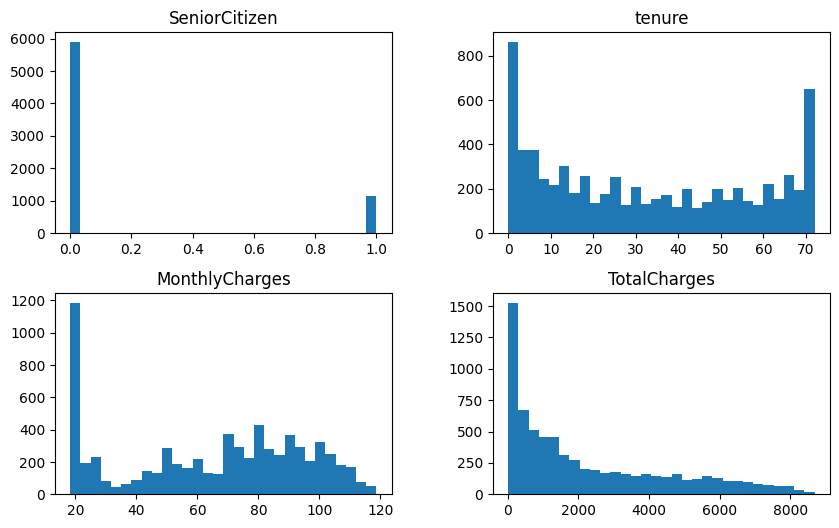

In [8]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [9]:
df.agg(['skew', 'kurtosis']).transpose()

<ipython-input-9-bc27a7422d35>:1: FutureWarning: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['skew', 'kurtosis']).transpose()


,skew,kurtosis
SeniorCitizen,1.833633,1.362596
tenure,0.239540,-1.387372
MonthlyCharges,-0.220524,-1.257260
TotalCharges,0.961642,-0.231799


In [10]:
nan_df = df[df.isna().any(axis=1)]
print(nan_df)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [11]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# https://www.naukri.com/learning/articles/handling-missing-data-mean-median-mode/
# Mengisi missing value dengan nilai median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Melihat apakah ada missing value dari dataset
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### c. Handling Duplicate Data

In [13]:
# Mengecek baris yang duplikat
df.duplicated().sum()

22

In [14]:
# Count the number of non-duplicates
(~df.duplicated()).sum()

7021

In [15]:
# dropping duplicate values
df = df.drop_duplicates()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


## 1.2 Data Transformation

In [17]:
# df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df.head()

<ipython-input-17-c5c131203d5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [18]:
print ('Total Customer Loyal\t: {}'.format(df.Churn.value_counts()[0]))
print ('Total Customer Churn\t: {}'.format(df.Churn.value_counts()[1]))

Total Customer Loyal	: 5164
Total Customer Churn	: 1857


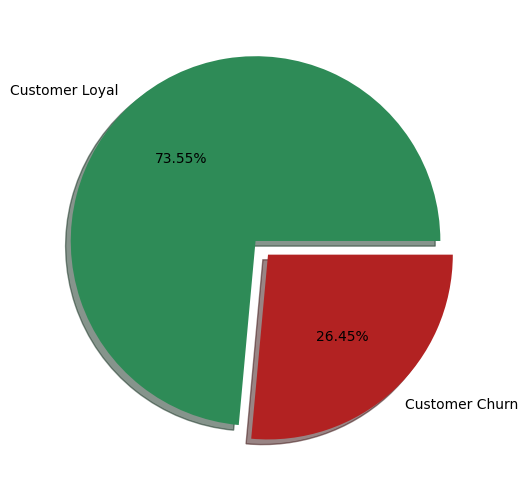

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(x=df["Churn"].value_counts(),
        colors=["seagreen", "firebrick"], 
        labels=["Customer Loyal", "Customer Churn"], 
        shadow = True, 
        autopct="%1.2f%%",
        explode=(0, 0.1)
        )

plt.show()

In [20]:
df.gender.value_counts()
# 0 = Laki-laki
# 1 = Perempuan

Male      3541
Female    3480
Name: gender, dtype: int64

In [21]:
print ('Total Laki-laki\t: {}'.format(df.gender.value_counts()['Male']))
print ('Total Perempuan\t: {}'.format(df.gender.value_counts()['Female']))

Total Laki-laki	: 3541
Total Perempuan	: 3480


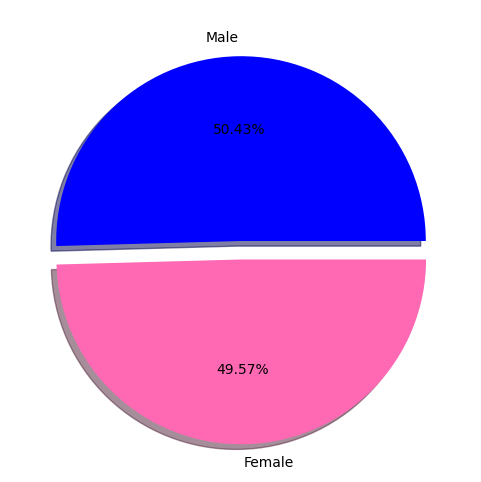

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(x=df["gender"].value_counts(), 
        colors=["blue", "hotpink"], 
        labels=["Male", "Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode=(0, 0.1)
        )

plt.show()

In [23]:
df.groupby('gender').Churn.value_counts()

gender  Churn
Female  0        2546
        1         934
Male    0        2618
        1         923
Name: Churn, dtype: int64

In [24]:
df.groupby('gender')['Churn'].value_counts().unstack()

Churn,0,1
gender,,
Female,2546,934
Male,2618,923


In [25]:
pd.crosstab(df.gender, df.Churn)

Churn,0,1
gender,,
Female,2546,934
Male,2618,923


In [26]:
# Replace redundant values
df.replace({'No phone service' : 'No',
            'No internet service' : 'No'},
            inplace=True)

df['SeniorCitizen'].replace({0 : 'No',
                             1 : 'Yes'},
                             inplace=True)

In [27]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '')

<ipython-input-27-8a23f69f901d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '')
<ipython-input-27-8a23f69f901d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '')


In [28]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("\nCategorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Categorical features:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [29]:
columns = df.columns
print("********** Numeric field **********n")
for i in range(len(columns)):
    if df[columns[i]].dtypes!=object:
        print("Unique of {} -> {}".format(columns[i], len(df[columns[i]].unique())))
        
print("\n********** Categorical field **********n")
for i in range(len(columns)):
    if df[columns[i]].dtypes==object:
        print("Unique of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

********** Numeric field **********n
Unique of tenure -> 73
Unique of MonthlyCharges -> 1585
Unique of TotalCharges -> 6531
Unique of Churn -> 2

********** Categorical field **********n
Unique of gender -> 2
Unique of SeniorCitizen -> 2
Unique of Partner -> 2
Unique of Dependents -> 2
Unique of PhoneService -> 2
Unique of MultipleLines -> 2
Unique of InternetService -> 3
Unique of OnlineSecurity -> 2
Unique of OnlineBackup -> 2
Unique of DeviceProtection -> 2
Unique of TechSupport -> 2
Unique of StreamingTV -> 2
Unique of StreamingMovies -> 2
Unique of Contract -> 3
Unique of PaperlessBilling -> 2
Unique of PaymentMethod -> 4


In [30]:
for i in range(len(numerical_features)):
    print("********** {} **********".format(numerical_features[i]))
    print(df[numerical_features[i]].unique(), "\n")

********** tenure **********
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

********** MonthlyCharges **********
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

********** TotalCharges **********
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 

********** Churn **********
[0 1] 



In [31]:
for i in range(len(categorical_features)):
    print("********** {} **********".format(categorical_features[i]))
    print(df[categorical_features[i]].unique(), "\n")

********** gender **********
['Female' 'Male'] 

********** SeniorCitizen **********
['No' 'Yes'] 

********** Partner **********
['Yes' 'No'] 

********** Dependents **********
['No' 'Yes'] 

********** PhoneService **********
['No' 'Yes'] 

********** MultipleLines **********
['No' 'Yes'] 

********** InternetService **********
['DSL' 'Fiber optic' 'No'] 

********** OnlineSecurity **********
['No' 'Yes'] 

********** OnlineBackup **********
['Yes' 'No'] 

********** DeviceProtection **********
['No' 'Yes'] 

********** TechSupport **********
['No' 'Yes'] 

********** StreamingTV **********
['No' 'Yes'] 

********** StreamingMovies **********
['No' 'Yes'] 

********** Contract **********
['Month-to-month' 'One year' 'Two year'] 

********** PaperlessBilling **********
['Yes' 'No'] 

********** PaymentMethod **********
['Electronic check' 'Mailed check' 'Bank transfer ' 'Credit card '] 



## 1.3 Summary Statistic

In [32]:
# Memahami karakteristik data melalui fitur-fitur numerik dengan function describe()
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2288.954490,2265.319449,18.80,411.15,1400.55,3801.7,8684.80
Churn,7021.0,0.264492,0.441094,0.00,0.00,0.00,1.0,1.00


In [33]:
# Memahami karakteristik data melalui fitur-fitur kategori dengan function describe()
df[categorical_features].describe().T

,count,unique,top,freq
gender,7021,2,Male,3541
SeniorCitizen,7021,2,No,5880
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,2,No,4050
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,2,No,5002
OnlineBackup,7021,2,No,4592
DeviceProtection,7021,2,No,4599


## 1.4 Correlation

> [Referensi Korelasi Data](https://www.scribbr.com/statistics/pearson-correlation-coefficient/)

<ipython-input-34-af16a01c5fa8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot = True, cmap=plt.cm.Reds)


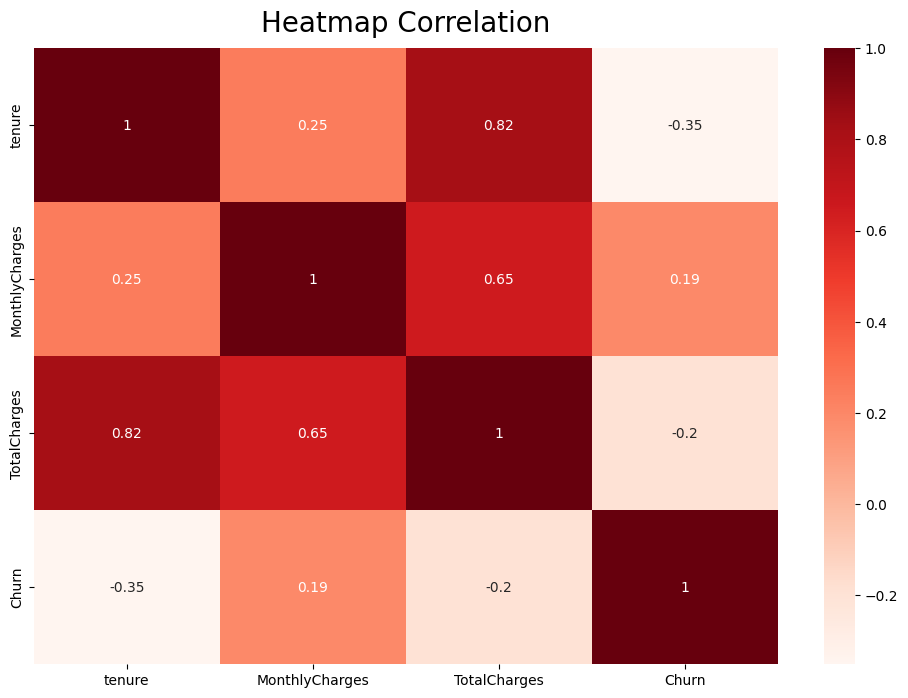

In [34]:
plt.subplots(figsize=(12, 8))
heatmap = sns.heatmap(df.corr(), annot = True, cmap=plt.cm.Reds)
heatmap.set_title('Heatmap Correlation', fontdict={'fontsize':20}, pad=12);

Text(0.5, 0, 'TotalCharges')

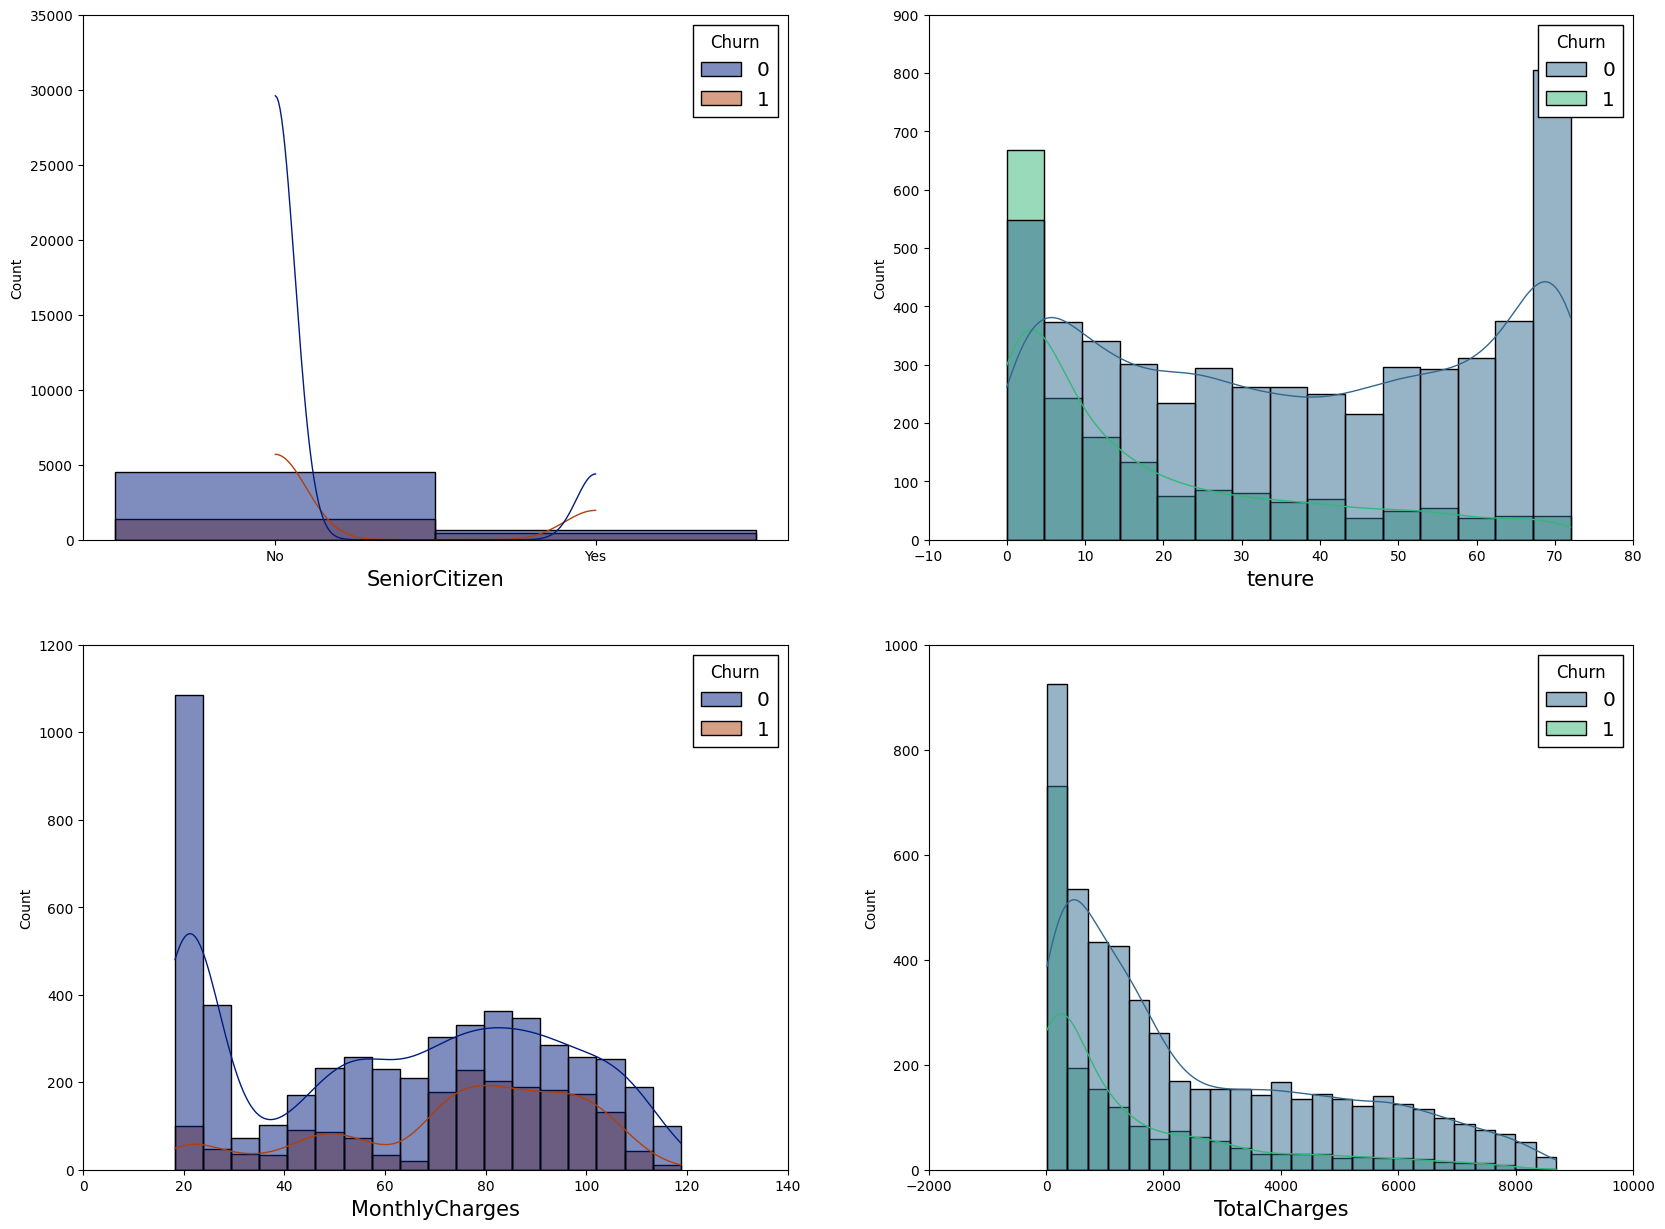

In [35]:
# Numerical Feature Visualization
fig, ax = plt.subplots(2, 2, figsize=(20, 15)) 
plt.style.use("classic")

sns.histplot(x=df["SeniorCitizen"], hue=df["Churn"], palette="dark", kde=True, ax=ax[0, 0]);
ax[0, 0].set_xlabel("SeniorCitizen", fontsize=15)
sns.histplot(x=df["tenure"], hue=df["Churn"], palette="viridis", kde=True, ax=ax[0, 1]);
ax[0, 1].set_xlabel("tenure", fontsize=15)
sns.histplot(x=df["MonthlyCharges"], hue=df["Churn"], palette="dark", kde=True, ax=ax[1, 0]);
ax[1, 0].set_xlabel("MonthlyCharges", fontsize=15)
sns.histplot(x=df["TotalCharges"], hue=df["Churn"], palette="viridis", kde=True, ax=ax[1, 1]);
ax[1, 1].set_xlabel("TotalCharges", fontsize=15)

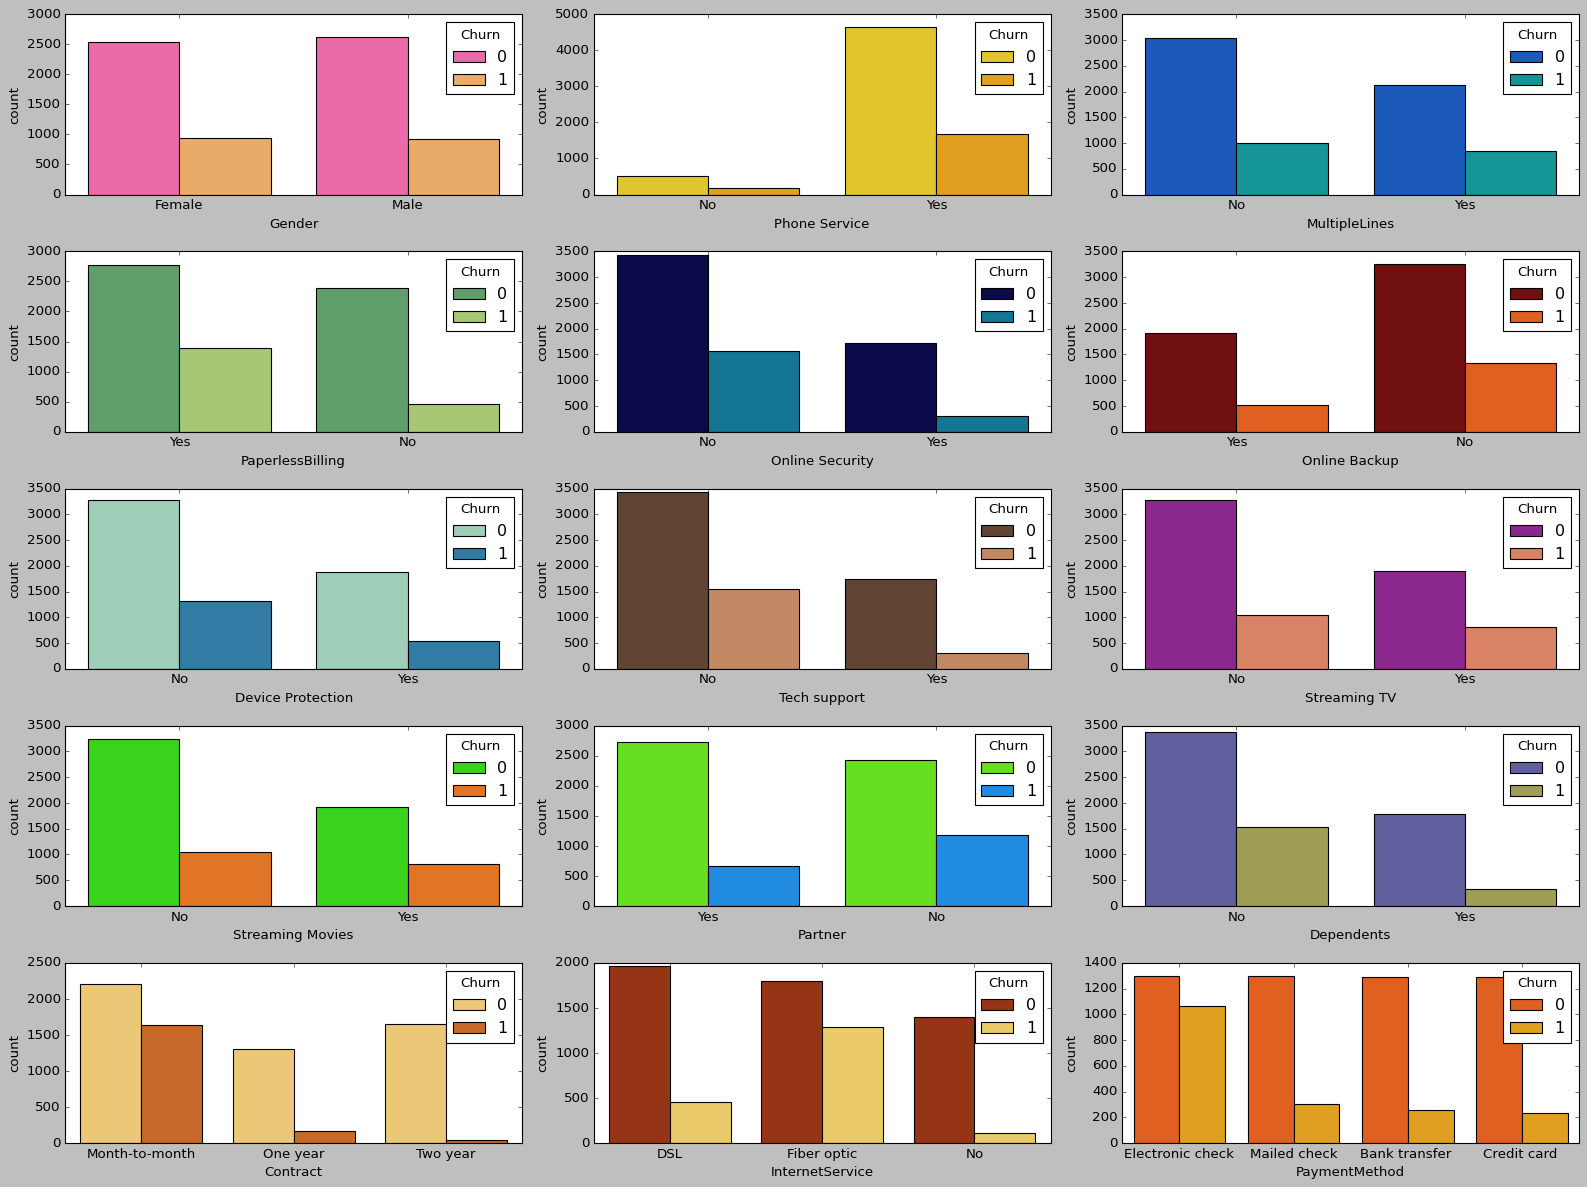

In [36]:
# Categorical Feature Visualization
fig, ax = plt.subplots(5, 3, figsize = (20, 15))

ax1 = sns.countplot(x='gender', data=df, hue='Churn', ax=ax[0, 0], palette='spring')
ax1.set(xlabel='Gender')
ax2 = sns.countplot(x='PhoneService', data=df, hue='Churn', ax=ax[0, 1], palette='Wistia')
ax2.set(xlabel='Phone Service')
ax3 = sns.countplot(x='MultipleLines', data=df, hue='Churn', ax=ax[0, 2], palette='winter')
ax3.set(xlabel='MultipleLines')
ax4 = sns.countplot(x='PaperlessBilling', data=df, hue='Churn', ax=ax[1, 0], palette='summer')
ax4.set(xlabel='PaperlessBilling')
ax5 = sns.countplot(x='OnlineSecurity', data=df, hue='Churn', ax=ax[1, 1], palette='ocean')
ax5.set(xlabel='Online Security')
ax6 = sns.countplot(x='OnlineBackup', data=df, hue='Churn', ax=ax[1, 2], palette='gist_heat')
ax6.set(xlabel='Online Backup')
ax7 = sns.countplot(x='DeviceProtection', data=df, hue='Churn', ax=ax[2, 0], palette='YlGnBu')
ax7.set(xlabel='Device Protection')
ax8 = sns.countplot(x='TechSupport', data=df, hue='Churn', ax=ax[2, 1], palette='copper')
ax8.set(xlabel='Tech support')
ax9 = sns.countplot(x='StreamingTV', data=df, hue='Churn', ax=ax[2, 2], palette='plasma')
ax9.set(xlabel='Streaming TV')
ax10 = sns.countplot(x='StreamingMovies', data=df, hue='Churn', ax=ax[3, 0], palette='gist_ncar')
ax10.set(xlabel='Streaming Movies')
ax11 = sns.countplot(x='Partner', data=df, hue='Churn', ax=ax[3, 1], palette='gist_rainbow')
ax11.set(xlabel='Partner')
ax12 = sns.countplot(x='Dependents', data=df, hue='Churn', ax=ax[3, 2], palette='gist_stern')
ax12.set(xlabel='Dependents')
ax13 = sns.countplot(x='Contract', data=df, hue='Churn', ax=ax[4, 0], palette='YlOrBr')
ax13.set(xlabel='Contract')
ax14 = sns.countplot(x='InternetService', data=df, hue='Churn', ax=ax[4, 1], palette='afmhot')
ax14.set(xlabel='InternetService')
ax15 = sns.countplot(x='PaymentMethod', data=df, hue='Churn', ax=ax[4, 2], palette='autumn')
ax15.set(xlabel='PaymentMethod')

plt.tight_layout()
plt.show()

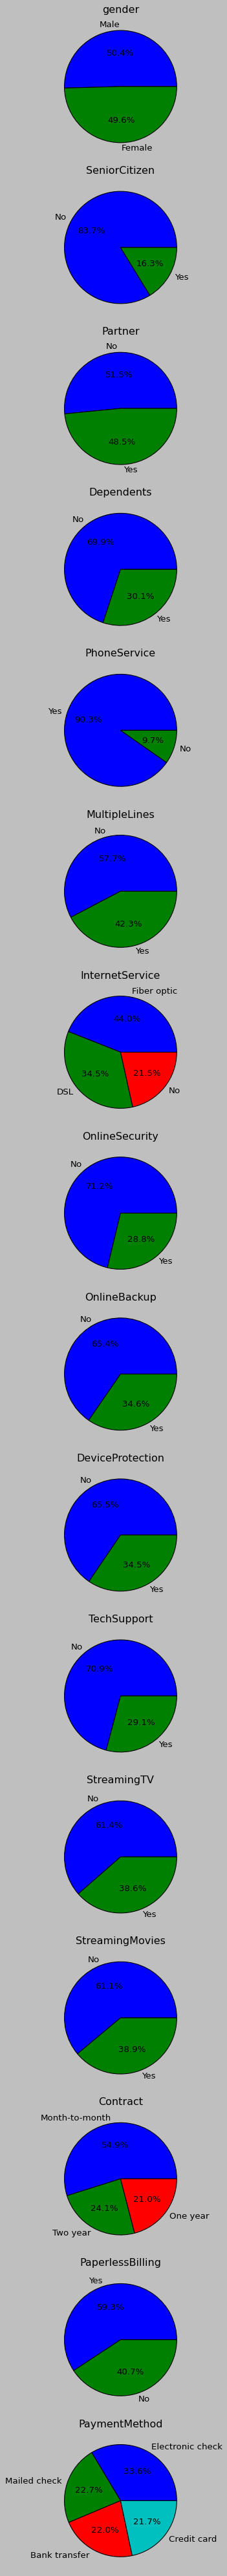

In [37]:
# Create pie chart for each column to see values in each column by categorical
categorical_features

# Set up the subplots
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(50, 50))

# Loop through each column in the DataFrame
for i, col in enumerate(categorical_features):
    # Create a pie chart for the column
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')
    
plt.tight_layout()

## 1.5 Outlier

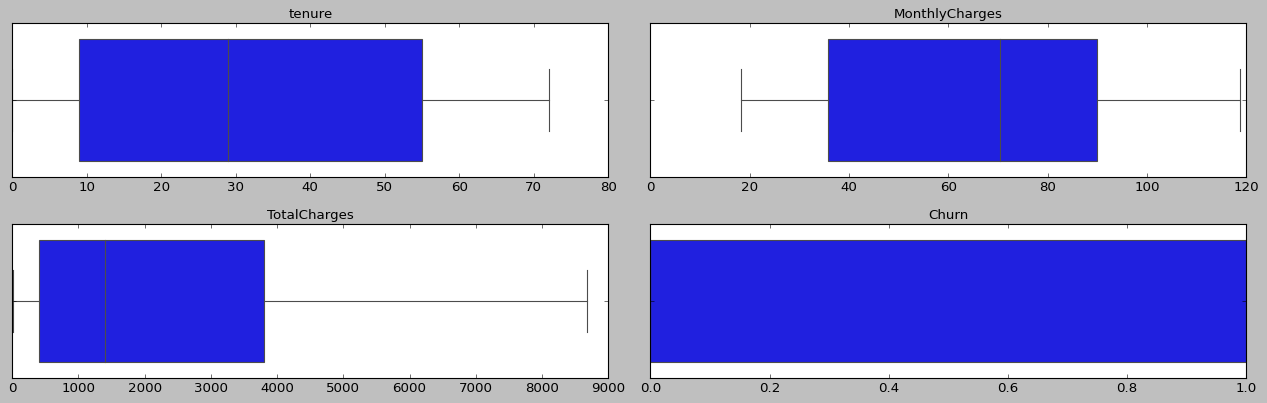

In [38]:
plt.figure(figsize=(16, 10))
plotnumber = 1
    
for feature in numerical_features:
    ax = plt.subplot(4, 2, plotnumber) #rows, column
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.xlabel(None)
    plt.tight_layout()
    plotnumber += 1

In [39]:
print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in numerical_features:
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    min_IQR = q1 - (1.5 * iqr)
    max_IQR = q3 + (1.5 * iqr)

    filtered_entries = ((df[col] >= min_IQR) & (df[col] <= max_IQR)) & filtered_entries
    df = df[filtered_entries]

print(f'Jumlah Baris Setelah Outlier Dihapus: {len(df)}')

Jumlah Baris Sebelum Outlier Dihapus: 7021
Jumlah Baris Setelah Outlier Dihapus: 7021


In [40]:
# # Membuat function IQR Detection
# def outlier(data):
#     q1 = data.quantile(0.25)
#     q3 = data.quantile(0.75)
#     iqr = q3 - q1
#     limit = iqr * 1.5
#     print(f'IQR: {iqr}')
#     upperlimit = q3 + limit
#     lowerlimit = q1 - limit
#     print(f'Upper Limit: {upperlimit}')
#     print(f'Lower Limit: {lowerlimit}')

# # Buang Outlier
# outlier_feature = [
#                     'tenure', 
#                     'MonthlyCharges',
#                     'TotalCharges'
#                   ]

# for i in outlier_feature:
#     print(i)
#     outlier(df[i])
#     print()

# df = df[
#         (df['tenure'] < 125.0) & 
#         (df['MonthlyCharges'] < 171.125) & 
#         (df['TotalCharges'] < 8887.525)
#        ]

# D. Categorical Encoding

> **Note:** Jenis-Jenis Tipe Data
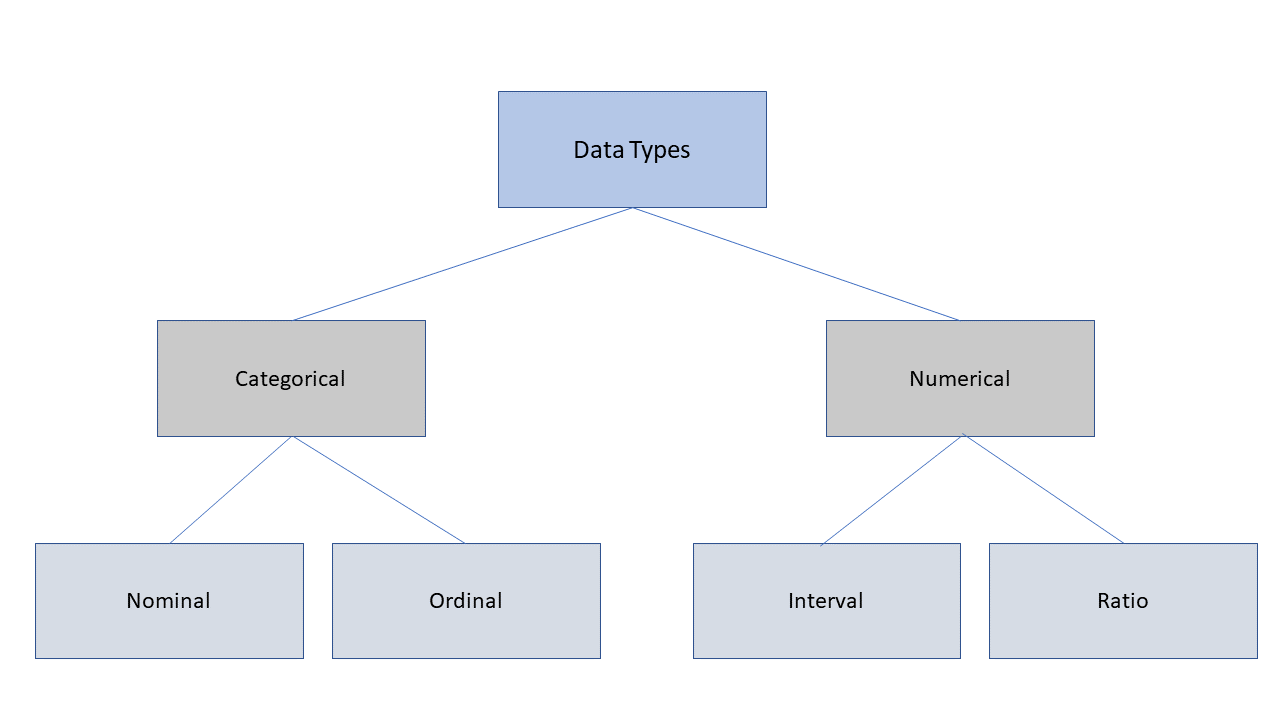

1. Data Nominal: Data nominal adalah data yang dapat diklasifikasikan ke dalam kategori atau label tanpa urutan tertentu. Contoh: jenis kelamin (Pria/Wanita), warna (Merah/Biru/Hijau), dll.
2. Data Ordinal: Data ordinal adalah data yang dapat diklasifikasikan ke dalam kategori atau label dengan urutan tertentu. Contoh: tingkat pendidikan (SD/SMP/SMA/Perguruan Tinggi), tingkat kesukaan (Sangat Tidak Suka/Tidak Suka/Netral/Suka/Sangat Suka), dll.
3. Data Interval: Data interval adalah data yang dapat diukur dalam skala yang tidak terbatas namun tidak memiliki nilai nol absolut. Contoh: suhu dalam derajat Fahrenheit, skala IQ, dll.
4. Data Rasio: Data rasio adalah data yang dapat diukur dalam skala yang tidak terbatas dan memiliki nilai nol absolut. Contoh: berat badan, tinggi badan, dll.

> **NOTE:**
> Perbedaan utama antara tipe data tersebut terletak pada cara data diukur dan diinterpretasikan. Data nominal hanya dapat di klasifikasikan, data ordinal memiliki urutan, data interval tidak memiliki nilai nol absolut, sementara data rasio memiliki nilai nol absolut sehingga dapat diukur perbandingannya.

1. Data kontinu: Data kontinu adalah data yang dapat diukur dalam skala yang tidak terbatas, seperti suhu, berat, tinggi, dll. Data ini dapat dinyatakan dalam bentuk angka desimal. Contoh : suhu tubuh, berat badan, tinggi badan, dll.
2. Data diskrit: Data diskrit adalah data yang dapat dihitung dan dinyatakan dalam bentuk angka bulat. Data diskrit dapat diklasifikasikan ke dalam kategori atau label. Contoh : jumlah anak, jenis kelamin, jenis pekerjaan, dll.
3. Data binari: Data binari adalah data yang hanya dapat memiliki dua nilai, yaitu 0 atau 1. Data ini sering digunakan dalam klasifikasi biner (binary classification), dimana setiap sampel diklasifikasikan sebagai kategori positif atau negatif. Contoh : status menikah (Menikah/Belum Menikah), status memiliki kartu kredit (ya/tidak), dll.

> **NOTE:**
> Perbedaan utama antara data kontinu, diskrit dan binari terletak pada cara data diukur dan diinterpretasikan. Data kontinu diukur dalam skala yang tidak terbatas, data diskrit diukur dalam skala yang terbatas dan dapat dihitung, sementara data binari hanya memiliki dua nilai yang mungkin.

* Dilihat dari isi value masing-masing fitur, maka encoding akan terbagi menjadi 2 yaitu: 
> 1. ***Ordinal Encoding*** untuk fitur kategorik tipe data ordinal.
> 2. ***One Hot Encoding*** untuk fitur kategorik tipe data nominal, interval, dan rasio.

In [41]:
# Untuk Uji Label Encoding
ordinal_data = ['Contract']
# Untuk Uji One Hot Encoding
nominal_data = df.select_dtypes(include="object").drop(columns=ordinal_data).columns.tolist()

print("Ordinal Data:")
pprint(ordinal_data)
print("\nNominal Data:")
pprint(nominal_data, compact=True)

Ordinal Data:
['Contract']

Nominal Data:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
 'PaperlessBilling', 'PaymentMethod']


## 2.1 Label Encoding

In [42]:
labelencoder = LabelEncoder()
df['Contract'] = labelencoder.fit_transform(df['Contract'])

le = pd.DataFrame(df)
display(le.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer,42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,1


## 2.2 One Hot Encoding

In [43]:
# Creating one hot encoding with pandas get dummy
encoding = pd.get_dummies(le, nominal_data)
encoding.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,29.85,29.85,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1,34,1,56.95,1889.50,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,1
2,2,0,53.85,108.15,1,0,1,1,0,1,...,1,0,1,0,0,1,0,0,0,1
3,45,1,42.30,1840.75,0,0,1,1,0,1,...,1,0,1,0,1,0,1,0,0,0
4,2,0,70.70,151.65,1,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0


In [44]:
encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7021 non-null   int64  
 1   Contract                        7021 non-null   int64  
 2   MonthlyCharges                  7021 non-null   float64
 3   TotalCharges                    7021 non-null   float64
 4   Churn                           7021 non-null   int64  
 5   gender_Female                   7021 non-null   uint8  
 6   gender_Male                     7021 non-null   uint8  
 7   SeniorCitizen_No                7021 non-null   uint8  
 8   SeniorCitizen_Yes               7021 non-null   uint8  
 9   Partner_No                      7021 non-null   uint8  
 10  Partner_Yes                     7021 non-null   uint8  
 11  Dependents_No                   7021 non-null   uint8  
 12  Dependents_Yes                  70

In [45]:
enc_df = encoding.drop(['gender_Female', 'SeniorCitizen_No', 'Partner_No', 'Dependents_No', 
                        'PhoneService_No', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No',
                        'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No',
                        'PaperlessBilling_No'], axis=1)
enc_df.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,29.85,29.85,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,34,1,56.95,1889.50,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,2,0,53.85,108.15,1,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
3,45,1,42.30,1840.75,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,2,0,70.70,151.65,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [46]:
enc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7021 non-null   int64  
 1   Contract                        7021 non-null   int64  
 2   MonthlyCharges                  7021 non-null   float64
 3   TotalCharges                    7021 non-null   float64
 4   Churn                           7021 non-null   int64  
 5   gender_Male                     7021 non-null   uint8  
 6   SeniorCitizen_Yes               7021 non-null   uint8  
 7   Partner_Yes                     7021 non-null   uint8  
 8   Dependents_Yes                  7021 non-null   uint8  
 9   PhoneService_Yes                7021 non-null   uint8  
 10  MultipleLines_Yes               7021 non-null   uint8  
 11  InternetService_DSL             7021 non-null   uint8  
 12  InternetService_Fiber optic     70

In [47]:
# enc_df.to_csv("df_encode.csv")

# E. Standarization
[Data Preproc](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-data-preprocessing)

In [48]:
# Define variable X (Independent variable / features set)
X = enc_df.drop('Churn', axis=1)
# axis=0 specifies that rows should be dropped.
# axis=1 specifies that columns should be dropped.

# Define variable y (Dependent variable / target set)
Y = enc_df["Churn"]

In [49]:
scaler = StandardScaler()
standarisasi = pd.DataFrame(
                            scaler.fit_transform(X),
                            columns=X.columns
                          )

display(standarisasi.head())

,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.282728,-0.830396,-1.164135,-0.997328,-1.008726,-0.440508,1.031400,-0.655475,-3.048725,-0.856493,...,1.374951,-0.725697,-0.640850,-0.792144,-0.798109,0.829057,-0.530948,-0.526097,1.405796,-0.542396
1,0.062387,0.368496,-0.262811,-0.176347,0.991349,-0.440508,-0.969556,-0.655475,0.328006,-0.856493,...,-0.727299,1.377985,-0.640850,-0.792144,-0.798109,-1.206190,-0.530948,-0.526097,-0.711341,1.843671
2,-1.241967,-0.830396,-0.365914,-0.962760,0.991349,-0.440508,-0.969556,-0.655475,0.328006,-0.856493,...,1.374951,-0.725697,-0.640850,-0.792144,-0.798109,0.829057,-0.530948,-0.526097,-0.711341,1.843671
3,0.510759,0.368496,-0.750058,-0.197869,0.991349,-0.440508,-0.969556,-0.655475,-3.048725,-0.856493,...,-0.727299,1.377985,1.560427,-0.792144,-0.798109,-1.206190,1.883422,-0.526097,-0.711341,-0.542396
4,-1.241967,-0.830396,0.194503,-0.943556,-1.008726,-0.440508,-0.969556,-0.655475,0.328006,-0.856493,...,-0.727299,-0.725697,-0.640850,-0.792144,-0.798109,0.829057,-0.530948,-0.526097,1.405796,-0.542396


Text(0.5, 1.0, 'After Scalling')

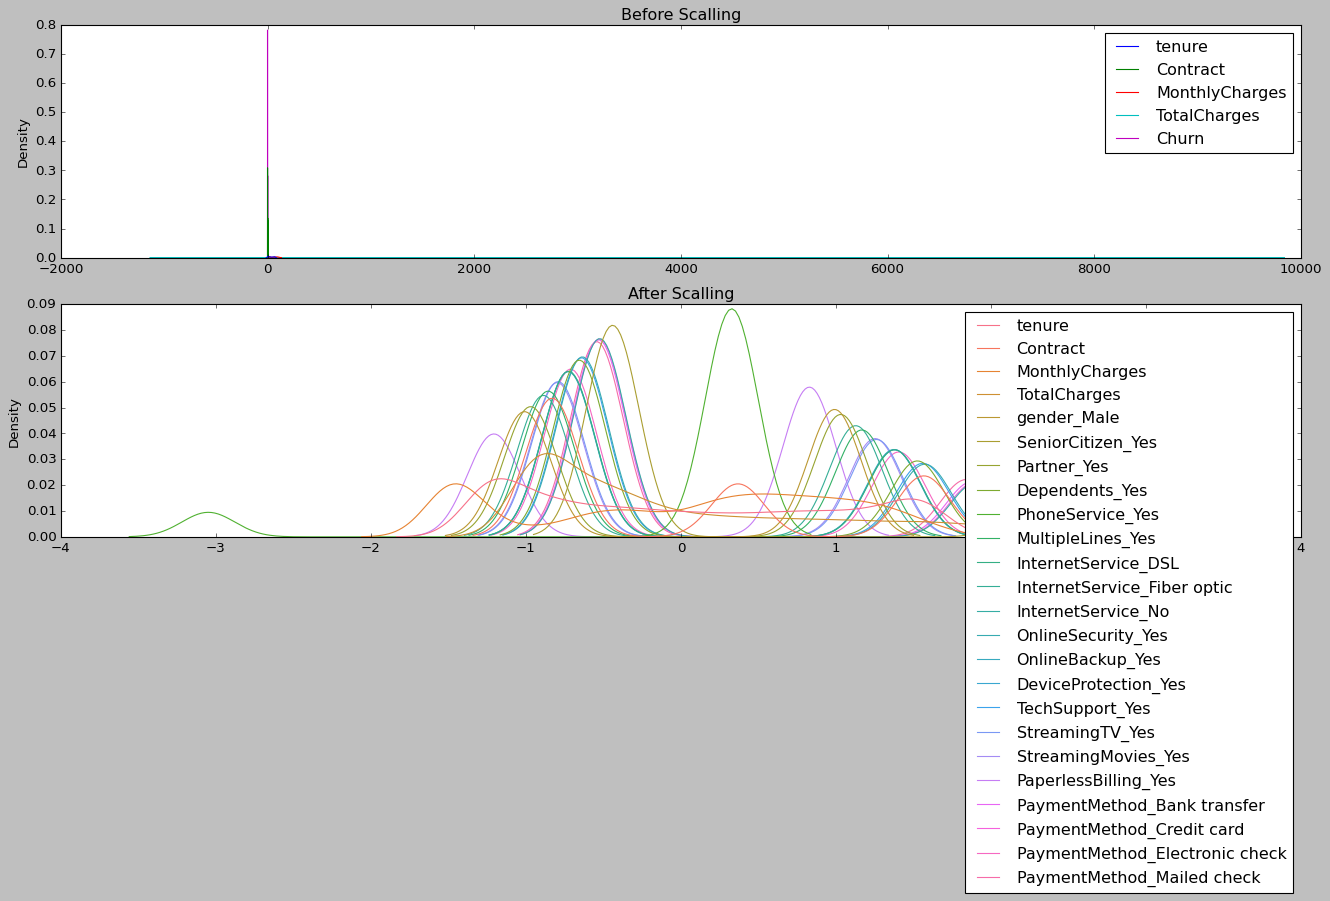

In [50]:
fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1, figsize = (20, 8))

sns.kdeplot(data=df, ax=ax1)
ax1.set_title('Before Scalling')

sns.kdeplot(data=standarisasi, ax=ax2)
ax2.set_title('After Scalling')

# F. SMOTE

In [51]:
# Jumlah data pada atribut 'Churn' sebelum SMOTE
df['Churn'].value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

In [52]:
# Define SMOTE Data Train
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X, Y)

# Jumlah data pada atribut 'Churn' setelah SMOTE
print('Original dataset shape is', Counter(Y))
print('Resample dataset shape is', Counter(Y_smote))
print("\n==========\n")
print(X_smote.shape)
print(Y_smote.shape)

Original dataset shape is Counter({0: 5164, 1: 1857})
Resample dataset shape is Counter({0: 5164, 1: 5164})


(10328, 24)
(10328,)


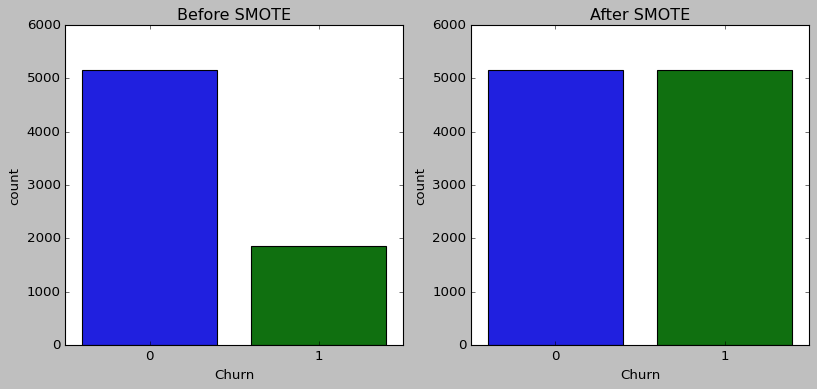

In [53]:
fig, axis = plt.subplots(1, 2, figsize=(12, 5))

for idx, label in enumerate([
    (Y, "Before SMOTE"), (Y_smote, "After SMOTE")
]):
    sns.countplot(x=label[0], ax=axis[idx])
    axis[idx].set_title(label[1])
    axis[idx].grid(False)
plt.show()

# G. Split Data

* X_train: Untuk menampung data source yang akan dilatih.
* X_test: Untuk menampung data target yang akan dilatih.
* Y_train: Untuk menampung data source yang akan digunakan untuk testing.
* Y_test: Untuk menampung data target yang akan digunakan untuk testing.
<p>
* X_train: the training data for the feature set X
* X_test: the testing data for the feature set X
* Y_train: the training data for the target vector Y
* Y_test: the testing data for the target vector Y

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=0)
# The random_state=0 argument sets the random seed to 0, 
# so that the same random sample will be used each time the code is run.

In [55]:
print("Data Train:")
pprint(Y_train.value_counts())

print("\nData Test:")
pprint(Y_test.value_counts())

Data Train:
0    4199
1    4063
Name: Churn, dtype: int64

Data Test:
1    1101
0     965
Name: Churn, dtype: int64


In [56]:
print("Jumlah data x_train yang digunakan adalah  : ", X_train.shape)
print("Jumlah data x_test yang digunakan adalah   : ", X_test.shape)
print("Jumlah data y_train yang digunakan adalah  : ", Y_train.shape)
print("Jumlah data y_test yang digunakan adalah   : ", Y_test.shape)

Jumlah data x_train yang digunakan adalah  :  (8262, 24)
Jumlah data x_test yang digunakan adalah   :  (2066, 24)
Jumlah data y_train yang digunakan adalah  :  (8262,)
Jumlah data y_test yang digunakan adalah   :  (2066,)


# H. Hyperparameter Tuning

In [111]:
# Define the hyperparameter grid
# np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples
# The np.logspace() function generates an array of numbers that are evenly spaced on a logarithmic scale. 
# In this case, the function generates 100 numbers between 10^0 and 10^-9, inclusive. 
# These numbers will be used as possible values for the 'var_smoothing' parameter in a Naive Bayes classifier.
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Create a Naive Bayes classifier object
nb = GaussianNB()

# Create a GridSearchCV object with the specified hyperparameter grid
nb_grid = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=5, verbose=3, refit='roc_auc', scoring=['accuracy', 'recall', 'precision', 'roc_auc'])

# Fit the GridSearchCV object to the training data
nb_grid.fit(X_train, Y_train.values.ravel())

# Get the best hyperparameters and corresponding test accuracy
best_params_nb = nb_grid.best_params_
print("Best parameters  :", best_params_nb)

best_score_nb = nb_grid.best_score_
print("Best AUC-ROC     :", best_score_nb)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END var_smoothing=1.0; accuracy: (test=0.587) precision: (test=0.557) recall: (test=0.781) roc_auc: (test=0.670) total time=   0.1s
[CV 2/5] END var_smoothing=1.0; accuracy: (test=0.578) precision: (test=0.550) recall: (test=0.779) roc_auc: (test=0.648) total time=   0.1s
[CV 3/5] END var_smoothing=1.0; accuracy: (test=0.574) precision: (test=0.549) recall: (test=0.765) roc_auc: (test=0.646) total time=   0.0s
[CV 4/5] END var_smoothing=1.0; accuracy: (test=0.590) precision: (test=0.559) recall: (test=0.784) roc_auc: (test=0.663) total time=   0.1s
[CV 5/5] END var_smoothing=1.0; accuracy: (test=0.583) precision: (test=0.554) recall: (test=0.777) roc_auc: (test=0.646) total time=   0.1s
[CV 1/5] END var_smoothing=0.8111308307896871; accuracy: (test=0.586) precision: (test=0.556) recall: (test=0.781) roc_auc: (test=0.670) total time=   0.1s
[CV 2/5] END var_smoothing=0.8111308307896871; accuracy: (test=0.578) precis

In [112]:
# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 250, 500, 750, 1000],
    'criterion': ['entropy', 'gini']
}

# Create a Random Forest classifier object
rf = RandomForestClassifier()

# Create a GridSearchCV object with the specified hyperparameter grid 
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, verbose=3, refit='roc_auc', scoring=['accuracy', 'recall', 'precision', 'roc_auc'])

# Fit the GridSearchCV object to the training data
rf_grid.fit(X_train, Y_train.values.ravel())

# Get the best hyperparameters and corresponding test accuracy
best_params_rf = rf_grid.best_params_
print("Best parameters  :", best_params_rf)

best_score_rf = rf_grid.best_score_
print("Best AUC-ROC     :", best_score_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, n_estimators=100; accuracy: (test=0.846) precision: (test=0.829) recall: (test=0.865) roc_auc: (test=0.934) total time=   1.1s
[CV 2/5] END criterion=entropy, n_estimators=100; accuracy: (test=0.842) precision: (test=0.845) recall: (test=0.831) roc_auc: (test=0.927) total time=   1.1s
[CV 3/5] END criterion=entropy, n_estimators=100; accuracy: (test=0.855) precision: (test=0.859) recall: (test=0.844) roc_auc: (test=0.927) total time=   1.1s
[CV 4/5] END criterion=entropy, n_estimators=100; accuracy: (test=0.841) precision: (test=0.843) recall: (test=0.833) roc_auc: (test=0.922) total time=   1.3s
[CV 5/5] END criterion=entropy, n_estimators=100; accuracy: (test=0.845) precision: (test=0.848) recall: (test=0.834) roc_auc: (test=0.929) total time=   1.6s
[CV 1/5] END criterion=entropy, n_estimators=250; accuracy: (test=0.851) precision: (test=0.836) recall: (test=0.866) roc_auc: (test=0.933) tota

# I. Modelling
(Confusion Matrix)[https://github.com/scikit-learn/scikit-learn/issues/19513]

In [113]:
# Confusion Matrix
def classification_matrix (aktual, prediksi, nama_model):
    cm = confusion_matrix(aktual, prediksi, labels=[0, 1]) # Actual: row table, Predict: column table
    tp = cm[1][1] # actual 1, predict 1
    tn = cm[0][0] # actual 0, predict 0
    fp = cm[0][1] # actual 0, predict 1
    fn = cm[1][0] # actual 1, predict 0
    
    accuracy = round((tp + tn) / (tp + tn + fp + fn) * 100, 2)
    precision = round((tp) / (tp + fp) * 100, 2)
    recall = round((tp) / (tp + fn) * 100, 2)
    f1_score = round((2 * (precision * recall) / (precision + recall)))
    
    print('Evaluation Model:', nama_model)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

## a. Naive Bayes + SMOTE

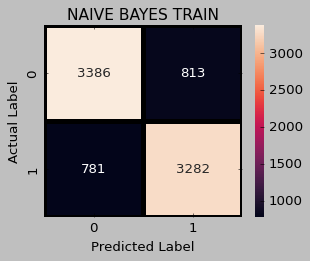


**********



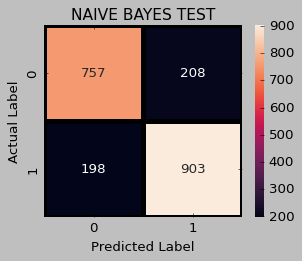


**********

Training Accuracy	: 80.7069
Testing Accuracy	: 80.3485

**********

Jumlah data prediksi benar :  1660  data
Jumlah data prediksi salah :  406  data

**********



,Actual,Predict
7314,1,1
5325,0,0
6890,0,0
8533,1,1
3964,0,0
176,1,1
9686,1,1
7994,1,1
2033,1,1
2962,0,0


In [114]:
# Mendefinisikan model Naive Bayes
model_gnb = GaussianNB(var_smoothing=1e-09)  
  
# Training the model on the training dataset
# Fit() function is used to train the model using the training sets as parameters
model_gnb.fit(X_train, Y_train)
  
# Performing predictions on the test dataset
pred_train_gnb = model_gnb.predict(X_train)
pred_test_gnb = model_gnb.predict(X_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, pred_train_gnb),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("NAIVE BAYES TRAIN", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, pred_test_gnb),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("NAIVE BAYES TEST", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.4f}".format(model_gnb.score(X_train, Y_train) * 100))
print("Testing Accuracy\t: {0:.4f}".format(model_gnb.score(X_test, Y_test) * 100))

print("\n**********\n")

#Compute performance manually
prediksiBenar = (pred_test_gnb == Y_test).sum()
prediksiSalah = (pred_test_gnb != Y_test).sum()
 
print("Jumlah data prediksi benar : ", prediksiBenar, " data")
print("Jumlah data prediksi salah : ", prediksiSalah, " data")

print("\n**********\n")

# Membuat dataframe baru untuk membandingkan data test dengan data prediksi
data = pd.DataFrame({'Actual': Y_test, 'Predict': pred_test_gnb})
data.head(10)

In [115]:
classification_matrix(Y_train, pred_train_gnb, 'GAUSSIAN NAIVE BAYES TRAIN')

Evaluation Model: GAUSSIAN NAIVE BAYES TRAIN
[[3386  813]
 [ 781 3282]]
Accuracy   : 80.71 %
Precision  : 80.15 %
Recall     : 80.78 %
F1_Score   : 80 %


In [116]:
print(metrics.classification_report(Y_train, pred_train_gnb))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4199
           1       0.80      0.81      0.80      4063

    accuracy                           0.81      8262
   macro avg       0.81      0.81      0.81      8262
weighted avg       0.81      0.81      0.81      8262



In [117]:
classification_matrix(Y_test, pred_test_gnb, 'GAUSSIAN NAIVE BAYES TEST')

Evaluation Model: GAUSSIAN NAIVE BAYES TEST
[[757 208]
 [198 903]]
Accuracy   : 80.35 %
Precision  : 81.28 %
Recall     : 82.02 %
F1_Score   : 82 %


In [118]:
print(metrics.classification_report(Y_test, pred_test_gnb))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       965
           1       0.81      0.82      0.82      1101

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



## b. Random Forest + SMOTE

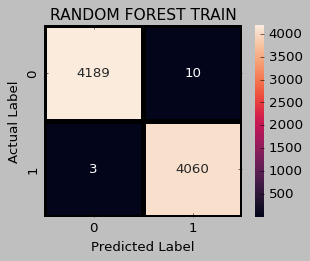


**********



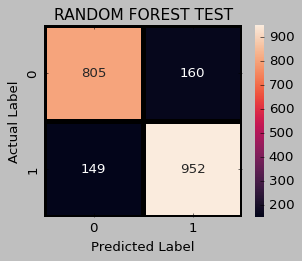


**********

Training Accuracy	: 99.84
Testing Accuracy	: 85.04

**********

Jumlah data prediksi benar :  1757  data
Jumlah data prediksi salah :  309  data

**********



,Actual,Predict
7314,1,1
5325,0,1
6890,0,0
8533,1,1
3964,0,0
176,1,1
9686,1,1
7994,1,1
2033,1,1
2962,0,0


In [119]:
model_rf = RandomForestClassifier(criterion='entropy', n_estimators=750)
model_rf.fit(X_train, Y_train)

pred_train_rf = model_rf.predict(X_train)
pred_test_rf = model_rf.predict(X_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, pred_train_rf),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST TRAIN", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, pred_test_rf),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST TEST", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.2f}".format(model_rf.score(X_train, Y_train) * 100))
print("Testing Accuracy\t: {0:.2f}".format(model_rf.score(X_test, Y_test) * 100))

print("\n**********\n")

#Compute performance manually
prediksiBenar = (pred_test_rf == Y_test).sum()
prediksiSalah = (pred_test_rf != Y_test).sum()
 
print("Jumlah data prediksi benar : ", prediksiBenar, " data")
print("Jumlah data prediksi salah : ", prediksiSalah, " data")

print("\n**********\n")

# Membuat dataframe baru untuk membandingkan data test dengan data prediksi
data = pd.DataFrame({'Actual': Y_test, 'Predict': pred_test_rf})
data.head(10)

In [120]:
classification_matrix(Y_train, pred_train_rf, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4189   10]
 [   3 4060]]
Accuracy   : 99.84 %
Precision  : 99.75 %
Recall     : 99.93 %
F1_Score   : 100 %


In [121]:
print(metrics.classification_report(Y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4199
           1       1.00      1.00      1.00      4063

    accuracy                           1.00      8262
   macro avg       1.00      1.00      1.00      8262
weighted avg       1.00      1.00      1.00      8262



In [122]:
classification_matrix(Y_test, pred_test_rf, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[805 160]
 [149 952]]
Accuracy   : 85.04 %
Precision  : 85.61 %
Recall     : 86.47 %
F1_Score   : 86 %


In [123]:
print(metrics.classification_report(Y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       965
           1       0.86      0.86      0.86      1101

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



In [124]:
# view the feature scores
feature_scores = pd.Series(model_rf.feature_importances_, 
                           index=X_train.columns
                          ).sort_values(ascending=False)
feature_scores

MonthlyCharges                    0.152112
TotalCharges                      0.147105
tenure                            0.129281
Contract                          0.112558
OnlineSecurity_Yes                0.038773
TechSupport_Yes                   0.035010
InternetService_No                0.030192
InternetService_Fiber optic       0.028752
Partner_Yes                       0.027257
PaymentMethod_Credit card         0.026045
Dependents_Yes                    0.024505
gender_Male                       0.024084
PaymentMethod_Bank transfer       0.023834
PaymentMethod_Mailed check        0.023270
OnlineBackup_Yes                  0.023048
PaymentMethod_Electronic check    0.022279
InternetService_DSL               0.021026
PaperlessBilling_Yes              0.020690
DeviceProtection_Yes              0.018297
MultipleLines_Yes                 0.016524
StreamingMovies_Yes               0.016175
StreamingTV_Yes                   0.015182
SeniorCitizen_Yes                 0.015069
PhoneServic

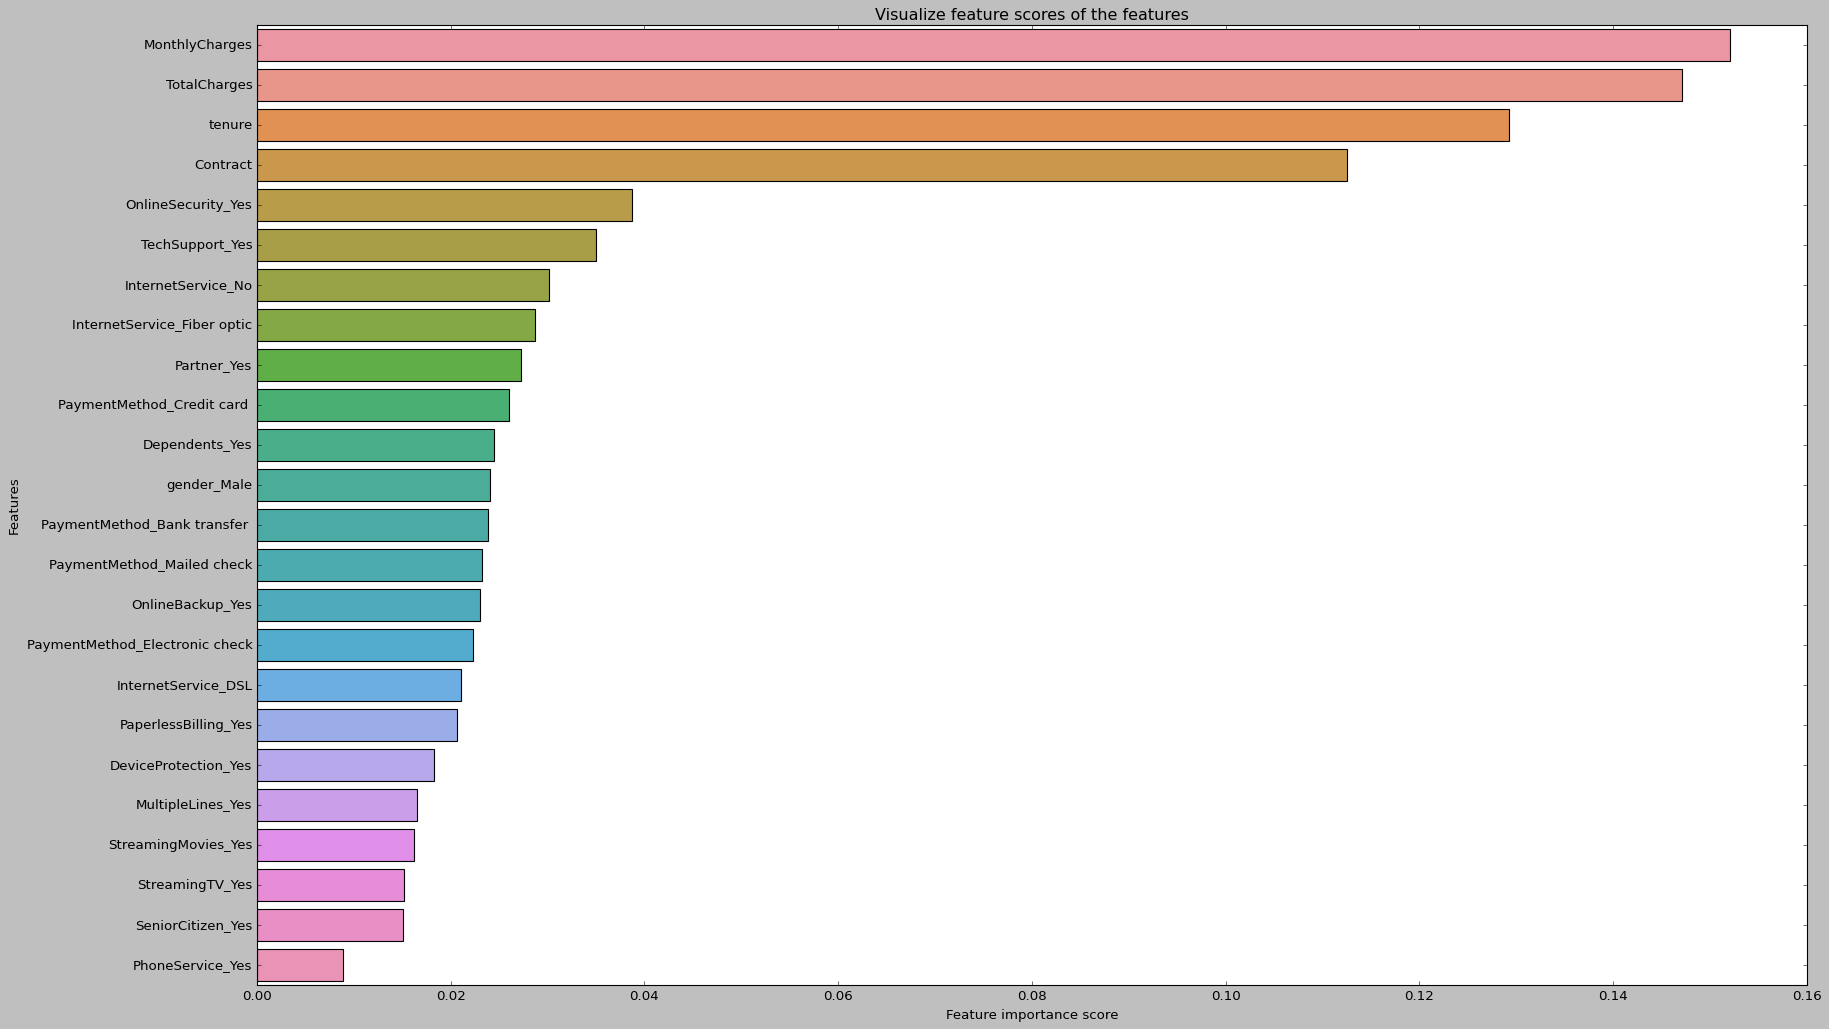

In [125]:
# Creating a seaborn bar plot
fig, ax = plt.subplots(figsize=(25, 15))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()